## Homework 5: PCA

#### Qingwen Wang

Upload the file 'Country-data.csv' in the files section.

Perform PCA with 2 principal components. Be sure to scale the data using StandardScaler first. 

Look at the first two principal components. Is it possible to give a rough interpretation of their meaning?

How much of the variance in the data is explained by the first 2 principal components.

Following the USA crime example in the notebook from class, see if you can plot the countries using the coordinates of their first two principal components. Does this make sense given your interpretation above? Does anything stand out? (Hint: The plot is a bit crowded with the text beside each point. It may be helpful to make a few plots with only 50 or so countries at a time to make it more readable.)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import datasets
from sklearn.metrics import accuracy_score

In [4]:
ctry = pd.read_csv('Country-data.csv')
ctry.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [6]:
ctry.isnull().any()

country       False
child_mort    False
exports       False
health        False
imports       False
income        False
inflation     False
life_expec    False
total_fer     False
gdpp          False
dtype: bool

In [7]:
ctry.isna().any()

country       False
child_mort    False
exports       False
health        False
imports       False
income        False
inflation     False
life_expec    False
total_fer     False
gdpp          False
dtype: bool

In [8]:
ctry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


Original dataset has 9 dimensions.

In [9]:
ctry.var()

child_mort    1.626423e+03
exports       7.514183e+02
health        7.545116e+00
imports       5.861042e+02
income        3.716439e+08
inflation     1.117398e+02
life_expec    7.908851e+01
total_fer     2.291734e+00
gdpp          3.359414e+08
dtype: float64

Variance are really big here, we need to scale down first.

In [11]:
Xctry=ctry.drop('country',axis=1)
yctry=ctry['country']

In [14]:
Xctry_scaled = StandardScaler().fit_transform(Xctry)

In [27]:
pca = PCA(2).fit(Xctry_scaled)
xctry_pca = pca.transform(Xctry_scaled)

In [131]:
pca.components_

array([[-0.41951945,  0.28389698,  0.15083782,  0.16148244,  0.39844111,
        -0.19317293,  0.42583938, -0.40372896,  0.39264482],
       [ 0.19288394,  0.61316349, -0.24308678,  0.67182064,  0.02253553,
        -0.00840447, -0.22270674,  0.15523311, -0.0460224 ]])

In [132]:
Xctry.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

compenent 1: people in countries with better economics status(developed country), have a better health system: they live longer, lower child mortatily rate <br>
compenent 2: people in countries with worse economics status(developing country), have a worse health system: they live shorter, higher child mortatily rate.<br>

In [129]:
print(pca.explained_variance_ratio_, sum(pca.explained_variance_ratio_))

[0.4595174  0.17181626] 0.6313336543771414


If we reduce dimension to 2, totally 63% of variabiity are explained.

In [130]:
pca5 = PCA(5).fit(Xctry_scaled)
sum(pca5.explained_variance_ratio_)

0.9453099756439514

5 dimension will be a much better one, since it explained nearly 95% variability. 

To make the plot more readable, we can either draw several plots with less countries; <br> or we can use ```adjustText``` to avoid overlapping of the annotations.

In [122]:
from adjustText import adjust_text

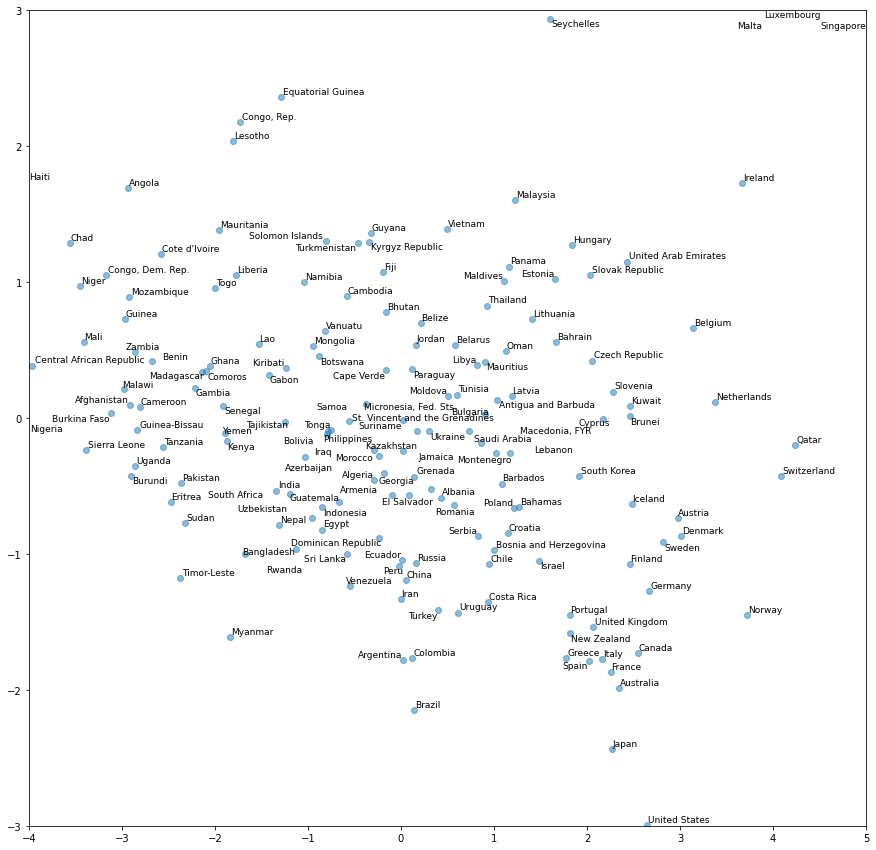

In [121]:
fig, ax = plt.subplots(figsize=(15,15))
xx=xctry_pca[:,0]
yy=xctry_pca[:,1]
ax.scatter(xx,yy, alpha=0.5)
ax.set_xlim([-4, 5])
ax.set_ylim([-3, 3])
texts = []
for x, y, s in zip(xx, yy, yctry):
        texts.append(plt.text(x, y, s, size=9))
adjustText.adjust_text(texts)
plt.show()

My interpretation above generally makes sense, it gives us a rough idea about the economics status and health; for example, in the bottom right corner, the United States and Japan both have a high value on component 1, and low value on component 2; which indicate these countries are wealthy and health system is better, people living here less likely to die early.<br>
But, we also should be aware that there could be exceptions since the loss of information during the pca process. <br>